<a href="https://colab.research.google.com/github/sapna-90/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
Train_data = pd.read_csv('/content/CP_train_data.csv')

In [3]:
Test_data = pd.read_csv('/content/CP_test_data.csv')

**Exploratory Data Analysis**

In [4]:
# Combine train and test datasets for unified processing

data = pd.concat([Train_data, Test_data], ignore_index=True)

In [5]:
print("\n--- Exploratory Data Analysis (EDA) ---\n")


--- Exploratory Data Analysis (EDA) ---



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  5000 non-null   object
 1   Product Brand        5000 non-null   object
 2   categories           5000 non-null   object
 3   primaryCategories    5000 non-null   object
 4   reviews.date         5000 non-null   object
 5   reviews.text         5000 non-null   object
 6   reviews.title        4987 non-null   object
 7   sentiment            4000 non-null   object
dtypes: object(8)
memory usage: 312.6+ KB


In [7]:
data.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [8]:
# Check for null values
print("Null values in the dataset:\n", data.isnull().sum())

Null values in the dataset:
 Name of the product       0
Product Brand             0
categories                0
primaryCategories         0
reviews.date              0
reviews.text              0
reviews.title            13
sentiment              1000
dtype: int64


In [9]:
# To remove the null values from the data

data.dropna(inplace=True)

In [10]:
# Check for null values
print("Null values in the dataset:\n", data.isnull().sum())

Null values in the dataset:
 Name of the product    0
Product Brand          0
categories             0
primaryCategories      0
reviews.date           0
reviews.text           0
reviews.title          0
sentiment              0
dtype: int64


<ipython-input-11-3c7c98c8aaf9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['sentiment'], palette='viridis')


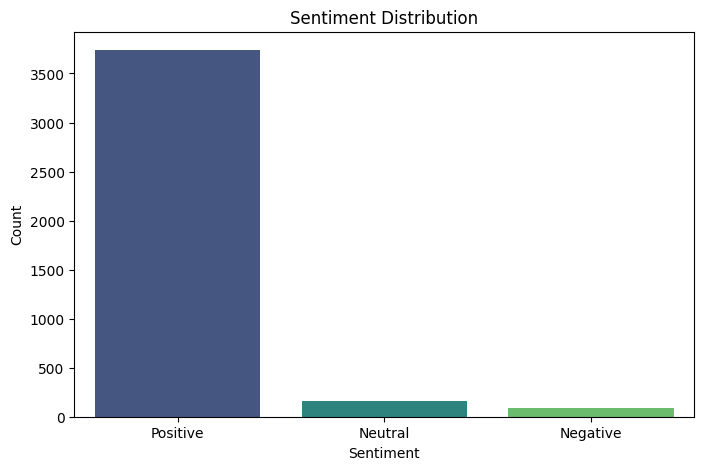

In [11]:
# Sentiment distribution analysis
plt.figure(figsize=(8, 5))
sns.countplot(x=data['sentiment'], palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

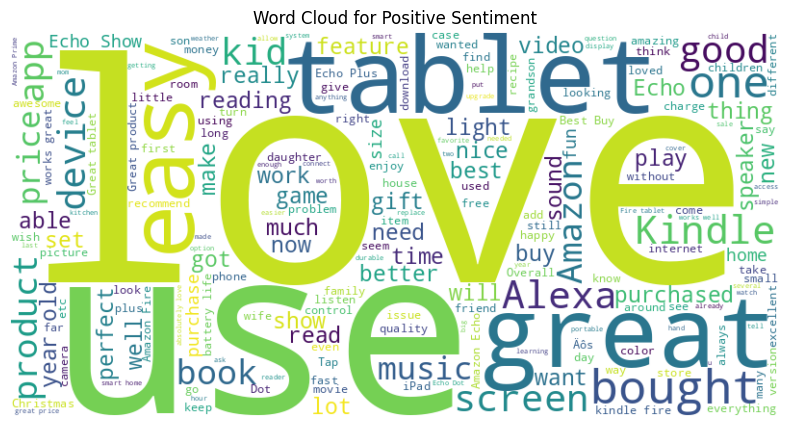

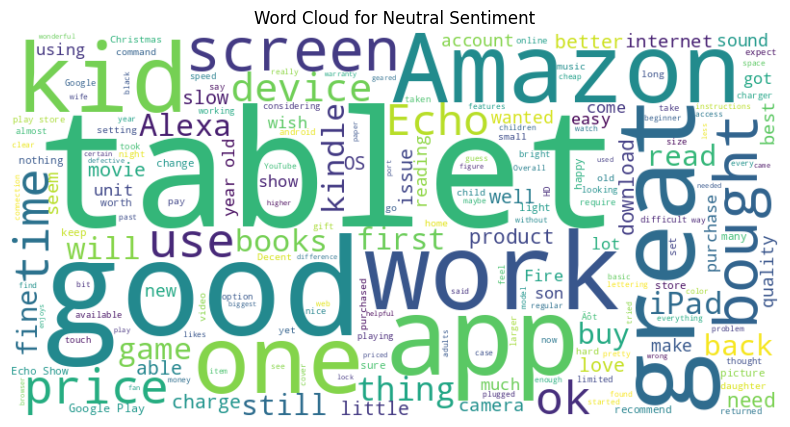

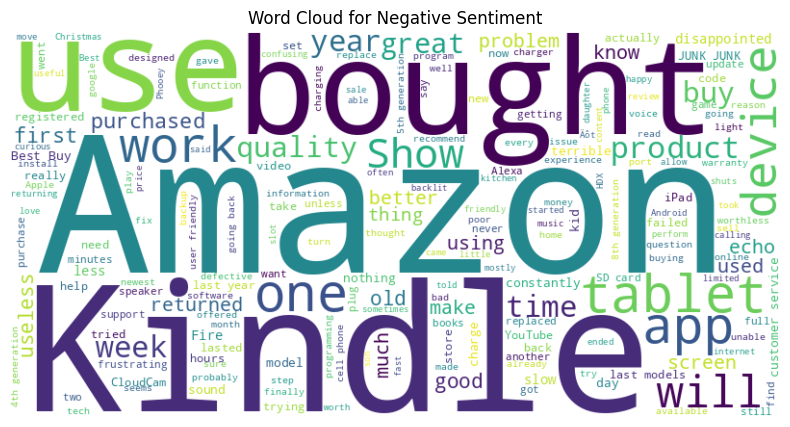

In [12]:
# Word Clouds for Positive, Neutral, and Negative Sentiments
for sentiment in data['sentiment'].unique():
    sentiment_text = ' '.join(data[data['sentiment'] == sentiment]['reviews.text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.axis('off')
    plt.show()

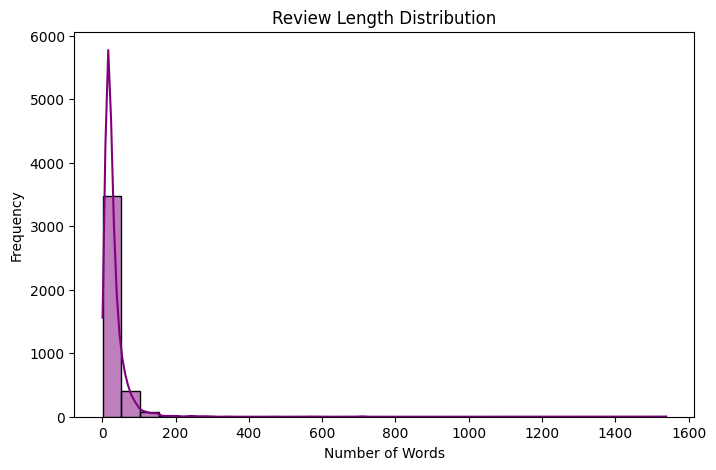

In [13]:
# Distribution of review lengths
data['review_length'] = data['reviews.text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(data['review_length'], bins=30, kde=True, color='purple')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

**Addressing Class Imbalance**



In [14]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [15]:
print("\n--- Addressing Class Imbalance ---\n")



--- Addressing Class Imbalance ---



In [16]:
# Check original class distribution
print("Original Sentiment Distribution:\n", Counter(data['sentiment']))

Original Sentiment Distribution:
 Counter({'Positive': 3739, 'Neutral': 158, 'Negative': 93})


<ipython-input-63-b54d851c4581>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['sentiment'], palette='coolwarm')


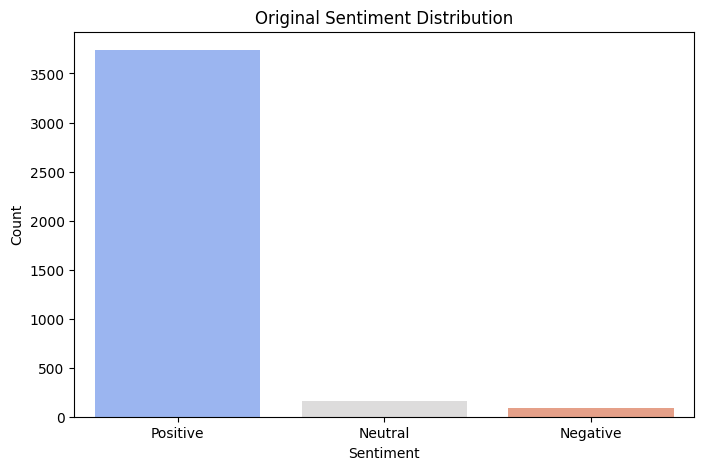

In [63]:
# Original Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=data['sentiment'], palette='coolwarm')
plt.title('Original Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [17]:
# Combine 'reviews.title' and 'reviews.text' into a single column
data['combined_review'] = data['reviews.title'] + " " + data['reviews.text']

In [18]:
# Apply oversampling on the combined column
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(data[['combined_review']], data['sentiment'])

In [19]:
# Update DataFrame for balanced data
balanced_data = pd.DataFrame({'review': X_resampled['combined_review'], 'sentiment': y_resampled})

# Check new class distribution
print("Balanced Sentiment Distribution:\n", Counter(balanced_data['sentiment']))

Balanced Sentiment Distribution:
 Counter({'Positive': 3739, 'Neutral': 3739, 'Negative': 3739})


<ipython-input-64-d88a21c6ae75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=balanced_data['sentiment'], palette='coolwarm')


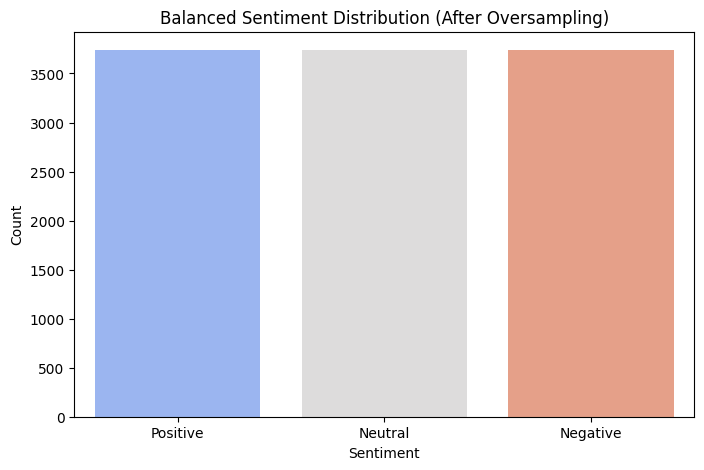

In [64]:
# 2. Balanced Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=balanced_data['sentiment'], palette='coolwarm')
plt.title('Balanced Sentiment Distribution (After Oversampling)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

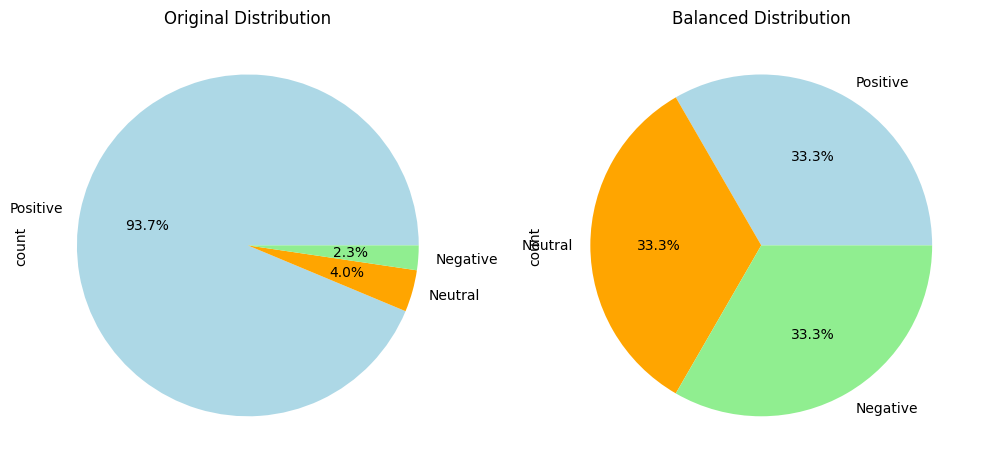

In [68]:
# 3. Pie Chart of Class Distribution (Before and After Oversampling)
fig, ax = plt.subplots(1, 2, figsize=(10, 9))
data['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], colors=['lightblue', 'orange', 'lightgreen'])
ax[0].set_title('Original Distribution')
balanced_data['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], colors=['lightblue', 'orange', 'lightgreen'])
ax[1].set_title('Balanced Distribution')
plt.tight_layout()
plt.show()

**Feature Engineering: TF-IDF Transformation**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("\n--- TF-IDF Transformation ---\n")


--- TF-IDF Transformation ---



In [21]:
# Convert text data into numerical form using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(balanced_data['review']).toarray()
y = balanced_data['sentiment']

In [22]:
# Display shape of the transformed data
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")

TF-IDF Matrix Shape: (11217, 4775)


In [69]:
# Visualize top features (words) from TF-IDF
tfidf_features = tfidf.get_feature_names_out()
tfidf_scores = np.mean(X_tfidf, axis=0)

In [72]:
# Top 10 words by average TF-IDF score
top_indices = np.argsort(tfidf_scores)[::-1][:10]
top_words = [tfidf_features[i] for i in top_indices]
top_scores = tfidf_scores[top_indices]

<ipython-input-74-b432a786c596>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='viridis')


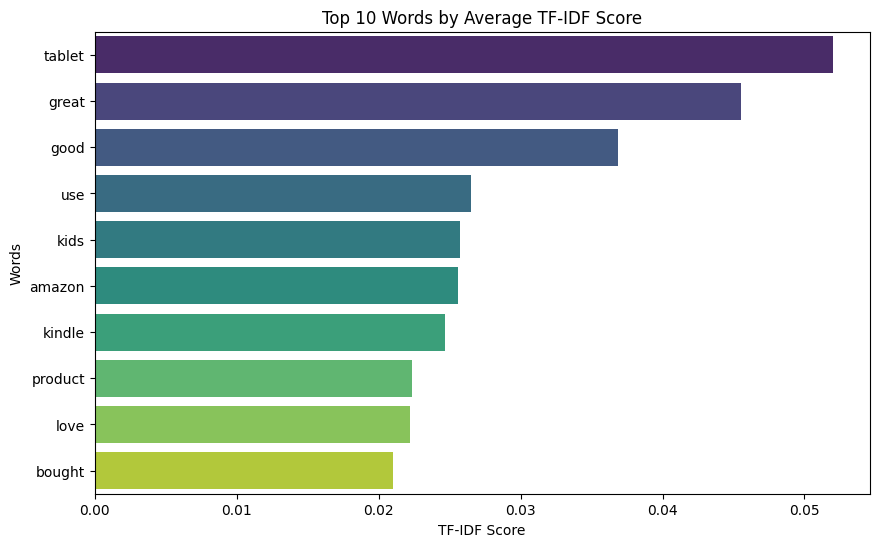

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_words, palette='viridis')
plt.title('Top 10 Words by Average TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()

**Multinomial Naive Bayes Classifier**


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


print("\n--- Multinomial Naive Bayes Classifier ---\n")


--- Multinomial Naive Bayes Classifier ---



In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Train a Multinomial Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [26]:
# Predict on test data
y_pred_nb = nb_model.predict(X_test)

In [27]:
# Evaluate the model
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Negative       0.97      1.00      0.98       748
     Neutral       0.93      0.97      0.95       748
    Positive       0.98      0.91      0.94       748

    accuracy                           0.96      2244
   macro avg       0.96      0.96      0.96      2244
weighted avg       0.96      0.96      0.96      2244

Confusion Matrix:
 [[748   0   0]
 [  7 724  17]
 [ 16  53 679]]
Accuracy: 0.9585561497326203


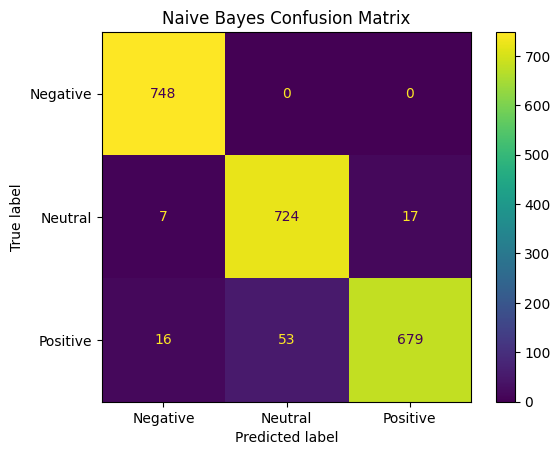

In [80]:
# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, display_labels=nb_model.classes_, cmap='viridis')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

**Support Vector Machine (SVM) Classifier**



In [28]:
from sklearn.svm import SVC

In [29]:
print("\n--- Support Vector Machine (SVM) ---\n")


--- Support Vector Machine (SVM) ---



In [30]:
# Train a Support Vector Machine classifier

svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [31]:
# Predict on test data
y_pred_svm = svm_model.predict(X_test)

In [33]:
# Evaluate the SVM model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

    Negative       0.99      1.00      1.00       748
     Neutral       0.98      1.00      0.99       748
    Positive       1.00      0.97      0.98       748

    accuracy                           0.99      2244
   macro avg       0.99      0.99      0.99      2244
weighted avg       0.99      0.99      0.99      2244

Confusion Matrix:
 [[748   0   0]
 [  0 748   0]
 [  4  19 725]]
Accuracy: 0.9897504456327986


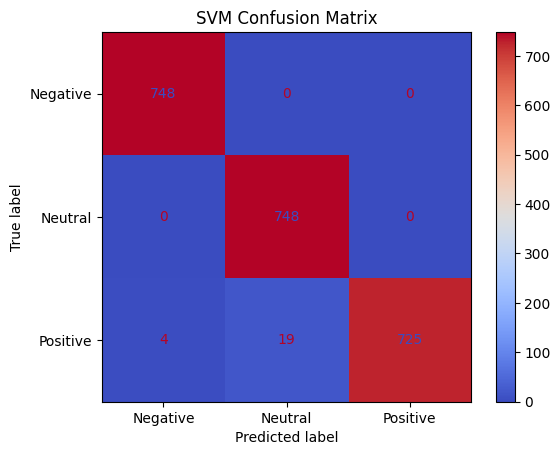

In [81]:
# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=svm_model.classes_, cmap='coolwarm')
plt.title('SVM Confusion Matrix')
plt.show()

In [82]:
# Precision-Recall Bar Plot
from sklearn.metrics import precision_recall_fscore_support

In [83]:
metrics = precision_recall_fscore_support(y_test, y_pred_svm, average=None)
labels = svm_model.classes_
metrics_df = pd.DataFrame({'Label': labels, 'Precision': metrics[0], 'Recall': metrics[1], 'F1-Score': metrics[2]})

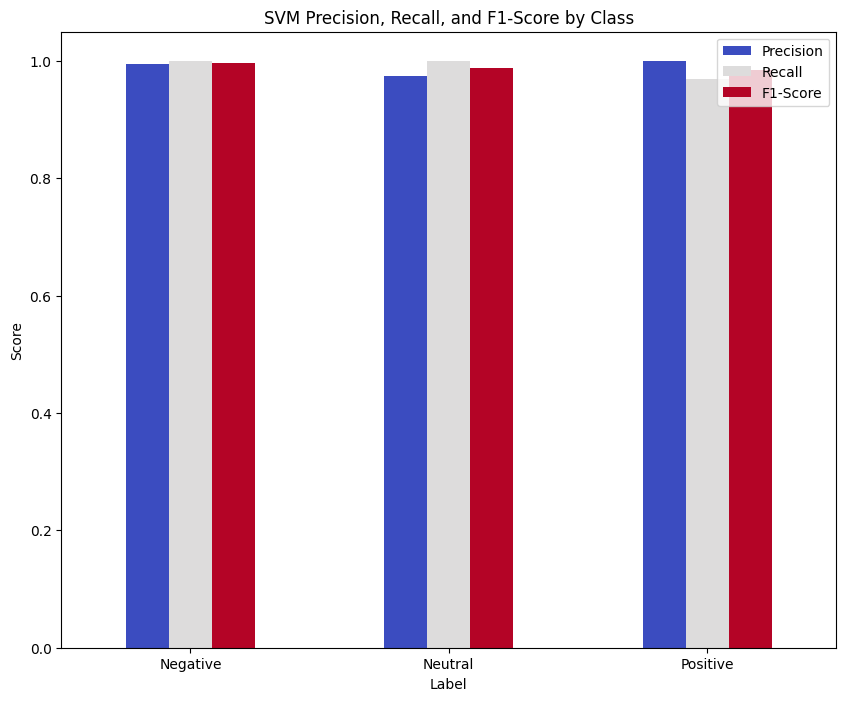

In [85]:
metrics_df.set_index('Label').plot(kind='bar', figsize=(10, 8), colormap='coolwarm', rot=0)
plt.title('SVM Precision, Recall, and F1-Score by Class')
plt.ylabel('Score')
plt.show()

**Neural Network: LSTM Implementation**



In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [35]:
print("\n--- LSTM Neural Network ---\n")


--- LSTM Neural Network ---



In [36]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(balanced_data['review'])
X_seq = tokenizer.texts_to_sequences(balanced_data['review'])
X_padded = pad_sequences(X_seq, maxlen=100)

In [44]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

In [45]:
# Fit the encoder on the 'sentiment' column and transform it
y_encoded = label_encoder.fit_transform(y)

In [46]:
# Split data into training and testing sets
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [47]:
# Define the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(data['sentiment'].unique()), activation='softmax')
])

In [48]:
# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
# Train the LSTM model
lstm_model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.6684 - loss: 0.8070 - val_accuracy: 0.9800 - val_loss: 0.0600
Epoch 2/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 21s 156ms/step - accuracy: 0.9812 - loss: 0.0576 - val_accuracy: 0.9911 - val_loss: 0.0259
Epoch 3/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - accuracy: 0.9954 - loss: 0.0159 - val_accuracy: 0.9933 - val_loss: 0.0192
Epoch 4/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 20s 149ms/step - accuracy: 0.9964 - loss: 0.0121 - val_accuracy: 0.9855 - val_loss: 0.0439
Epoch 5/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 0.9991 - loss: 0.0052 - val_accuracy: 0.9933 - val_loss: 0.0200


In [50]:
# Evaluate the LSTM model

lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_seq, y_test_seq)
print(f"LSTM Accuracy: {lstm_accuracy * 100:.2f}%")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9924 - loss: 0.0340
LSTM Accuracy: 99.15%


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


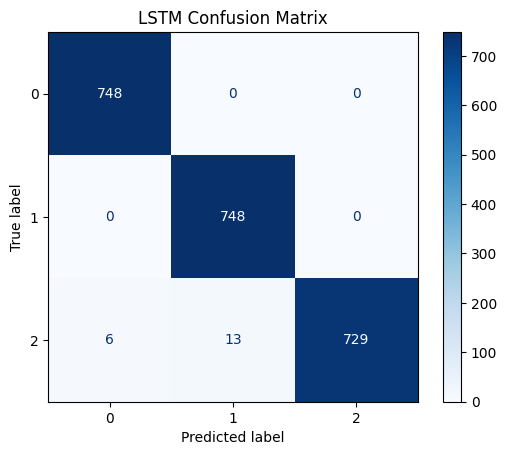

In [91]:
#  Confusion Matrix for LSTM Predictions
y_pred_lstm = np.argmax(lstm_model.predict(X_test_seq), axis=1)
ConfusionMatrixDisplay.from_predictions(y_test_seq, y_pred_lstm, cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.show()

**Topic Modeling with Latent Dirichlet Allocation (LDA)**



In [51]:
from sklearn.decomposition import LatentDirichletAllocation

In [52]:
print("\n--- Topic Modeling with Latent Dirichlet Allocation (LDA) ---\n")


--- Topic Modeling with Latent Dirichlet Allocation (LDA) ---



In [54]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
X_lda = tfidf.fit_transform(data['combined_review'])
lda.fit(X_lda)

LatentDirichletAllocation(n_components=5, random_state=42)

In [55]:
# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 1:
['works', 'use', 'good', 'price', 'product', 'alexa', 'tablet', 'love', 'echo', 'great']
Topic 2:
['product', 'wife', 'books', 'love', 'use', 'easy', 'good', 'tablet', 'great', 'kindle']
Topic 3:
['love', 'good', 'use', 'year', 'old', 'easy', 'loves', 'great', 'kids', 'tablet']
Topic 4:
['place', 'bought', 'phone', 'neat', 'love', 'awesome', 'work', 'great', 'kindle', 'item']
Topic 5:
['use', 'price', 'sound', 'read', 'like', 'good', 'kindle', 'love', 'great', 'tablet']


<ipython-input-92-fbb32093fccb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='mako')


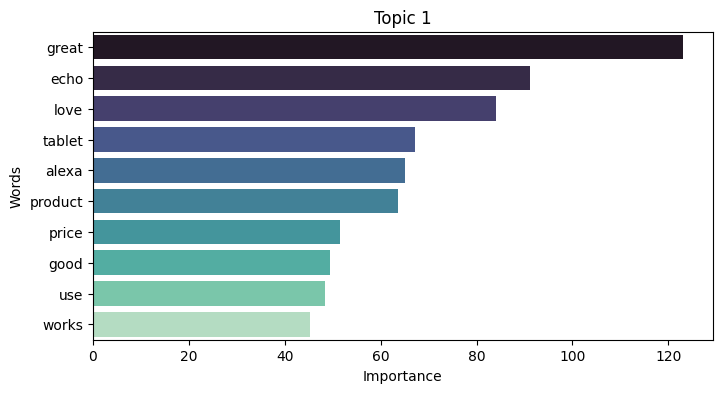

<ipython-input-92-fbb32093fccb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='mako')


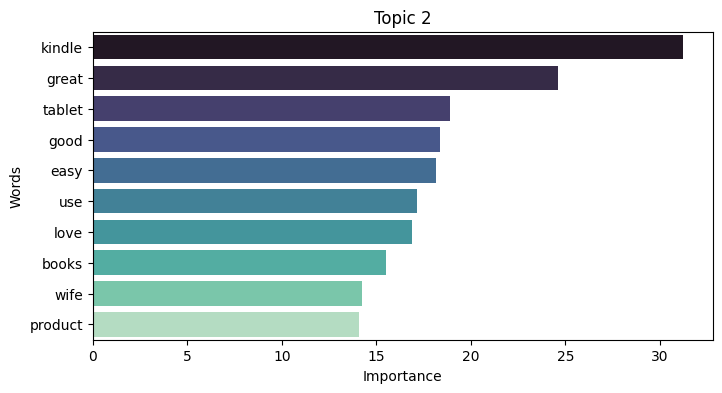

<ipython-input-92-fbb32093fccb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='mako')


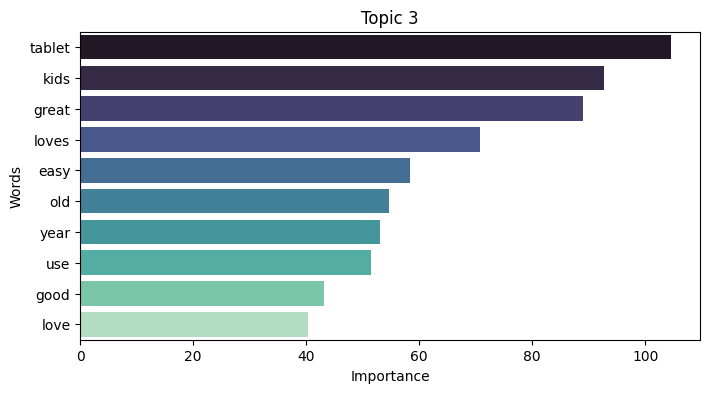

<ipython-input-92-fbb32093fccb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='mako')


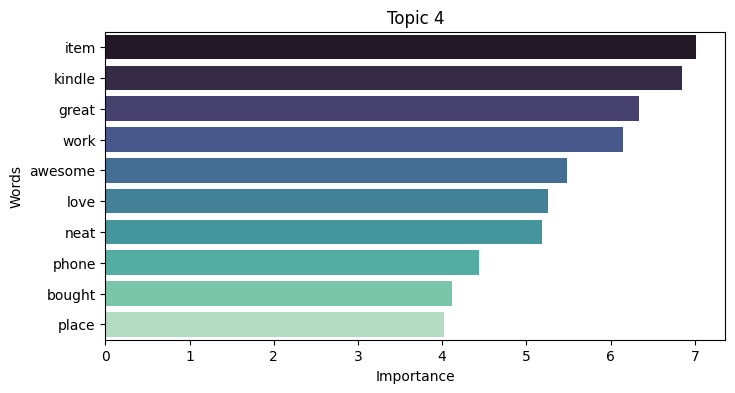

<ipython-input-92-fbb32093fccb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette='mako')


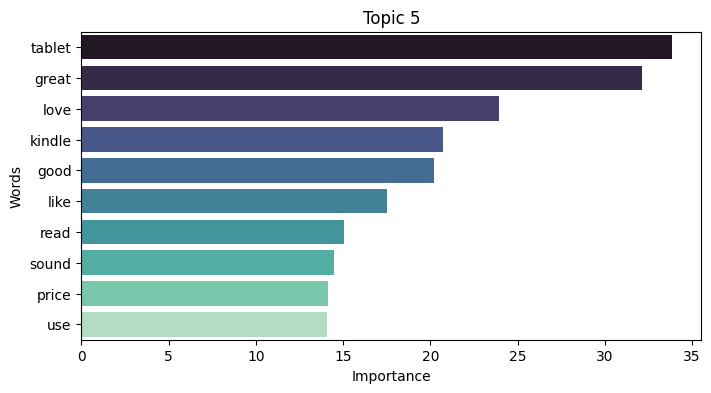

In [92]:
# Visualize LDA topics with word distributions
topics = lda.components_
vocab = tfidf.get_feature_names_out()

for topic_idx, topic in enumerate(topics):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [vocab[i] for i in top_words_idx]
    top_scores = topic[top_words_idx]

    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_scores, y=top_words, palette='mako')
    plt.title(f'Topic {topic_idx + 1}')
    plt.xlabel('Importance')
    plt.ylabel('Words')
    plt.show()

In [56]:
import joblib

In [57]:
print("\n--- Saving Models ---\n")


--- Saving Models ---



In [58]:
# Save Naive Bayes and SVM models
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [61]:
# Save the LSTM model
lstm_model.save('lstm_model.keras')

In [62]:
print("Models saved successfully!")

Models saved successfully!


<ipython-input-93-940b60dafb5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')


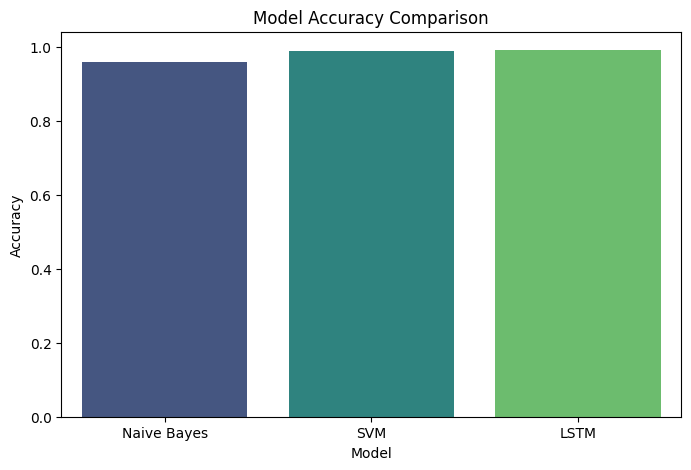

In [93]:
# Accuracy Comparison
accuracy_scores = {
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'LSTM': lstm_accuracy  # Already calculated during training
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()